In [2]:
import numpy as np
# Khởi tạo 1 ma trận 3*4
M = np.array([[1, 2, 3], [4, 5,6], [7, 8, 9], [10, 11, 12]])
print ('ma tran M \n', M)

ma tran M 
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [3]:
# Sử dụng hàm svd của numpy
U, S, Vt = np.linalg.svd(M, full_matrices=True)
print('U ', U)
print('S ', S)
print('Vt ', Vt)

U  [[-0.14087668  0.82471435  0.54482013  0.0563119 ]
 [-0.34394629  0.42626394 -0.76839925  0.33100241]
 [-0.54701591  0.02781353 -0.09766188 -0.83094053]
 [-0.75008553 -0.37063688  0.321241    0.44362621]]
S  [2.54624074e+01 1.29066168e+00 1.76998476e-15]
Vt  [[-0.50453315 -0.5745157  -0.64449826]
 [-0.76077568 -0.05714052  0.64649464]
 [-0.40824829  0.81649658 -0.40824829]]


In [13]:
# S là ma trận đường chéo, numpy hiển thị ra giá trị riêng của ma trận đường chéo thôi cho tiết kiệm bộ nhớ
# Kiểm tra 1 số tính chất của U, S, V
# U, V là 2 ma trận thành phần đơn vị trực giao,
# (U*chuyển vị của U)-> Ma trận đơn vị, từng thành phần của U có norm là 1
print('Norm của cột thứ 1 ma trận U', np.linalg.norm(U[:, 0]))
print('Norm của cột thứ 1 ma trận U', np.linalg.norm(U[:, 1]))

print('Norm của cột thứ 1 ma trận Vt', np.linalg.norm(Vt[:, 0]))
print('Norm của cột thứ 1 ma trận Vt', np.linalg.norm(U[:, 1]))

print('UU* = \n',np.dot(U, np.transpose(U)))

Norm của cột thứ 1 ma trận U 1.0000000000000002
Norm của cột thứ 1 ma trận U 0.9999999999999999
Norm của cột thứ 1 ma trận Vt 0.9999999999999999
Norm của cột thứ 1 ma trận Vt 0.9999999999999999
UU* = 
 [[ 1.00000000e+00 -6.59194921e-17  3.33066907e-16  2.84494650e-16]
 [-6.59194921e-17  1.00000000e+00  0.00000000e+00  2.77555756e-17]
 [ 3.33066907e-16  0.00000000e+00  1.00000000e+00  1.66533454e-16]
 [ 2.84494650e-16  2.77555756e-17  1.66533454e-16  1.00000000e+00]]


In [8]:
# Kiểm tra tính giảm dần của các trị riêng trên ma trận đường chéo
print('S ', S)


S  [2.54624074e+01 1.29066168e+00 1.76998476e-15]


In [14]:
# Kiểm tra xem việc khôi phục lại ma trận ban đầu sử dụng U, S, V có giống với M hay không
np.dot(U[:, :3], np.diag(S))

array([[-3.58705934e+00,  1.06442721e+00,  9.64323319e-16],
       [-8.75770068e+00,  5.50162531e-01, -1.36005496e-15],
       [-1.39283420e+01,  3.58978555e-02, -1.72860041e-16],
       [-1.90989834e+01, -4.78366820e-01,  5.68591680e-16]])

In [15]:
np.dot(np.dot(U[:, :3], np.diag(S)), Vt)

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.],
       [10., 11., 12.]])

In [16]:
# Output giống với ma trận M ban đầu

In [42]:
# Nén ảnh sử dụng SVD
# Ma trận S là ma trận giảm dần, các thành phần sau rất nhỏ
# Khi loại bỏ bớt ma trận xích ma thì ta sẽ cần cắt 2 ma trận còn lại 
# theo hệ số k

# U', S', V' = (m*k) *(k*k) * (k*n) = (m*n)
# Kích thước bằng nhau nhưng khi nhân lại chỉ có giá trị sấp xỉ vì 
# SVD -> Nén có mất mát thông tin
# Tỷ số nén = tỷ lệ số byte lư trữ sau khi nén với số lượng byte trên ảnh gốc
# Hệ số nén r =  (nk + k + km)/(nm)
# Ý tưởng là loại bỏ giá trị trị riêng có giá trị bé, ít ảnh hưởng đến giá trị gốc
# Đồng thời loại bỏ đi giá trị của 2 ma trận còn lại d

#tải ảnh


Image shape: (480, 720, 3)


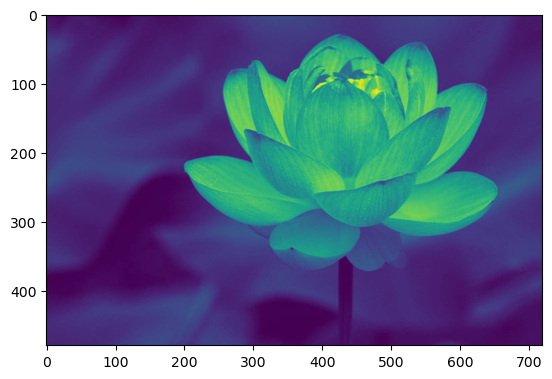

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as ln
from PIL import Image
import urllib.request
from io import BytesIO

url = str('https://hoatuoithanhthao.com/media/ftp/y-nghia-hoa-sen(1).jpg')
with urllib.request.urlopen(url) as url:
    f = BytesIO(url.read())

ig = np.array(Image.open(f))
print('Image shape: %s'%str(ig.shape))
# Convert to grey
ig = ig.dot([0.299, 0.5870, 0.114])
plt.imshow(ig)

In [65]:
def SVD_pic(k):
    """
    k: number of highest eigenvalues taken
    """
    #Take m, n shape
    m = ig.shape[0]
    n = ig.shape[1]
    #Singular Value Decomposition
    U, S, V = ln.svd(ig) 
    #Get id position of n highest eigenvalues
    id_trunc = np.argsort(S)[::-1][:k]
    #Extract matrix U_t, V_t, S_t
    U_t = U[np.ix_(np.arange(m), id_trunc)]
    V_t = V[np.ix_(id_trunc, np.arange(n))]
    S_diag = S[id_trunc]
    S_t = np.zeros((k, k))
    np.fill_diagonal(S_t, S_diag)
    #Return picture
    A = np.dot(U_t, S_t.dot(V_t))
    #Norm Frobenius
    fb = ln.norm(A-ig, 'fro')
    prt_retain = (1-fb**2/np.sum(S**2))*100
    plt.imshow(A)
    print('Percentage of information retained: %.2f%s \n'%(prt_retain, '%'))

Percentage of information retained: 92.40% 



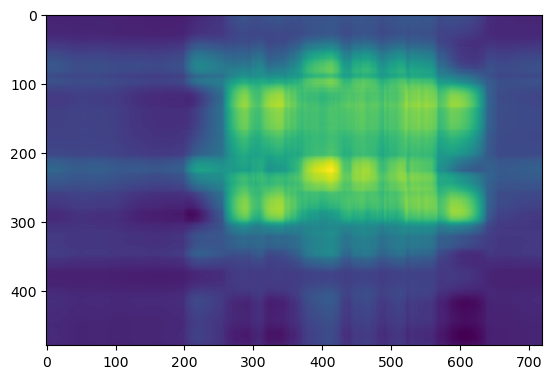

In [66]:
SVD_pic(2)

Percentage of information retained: 98.44% 



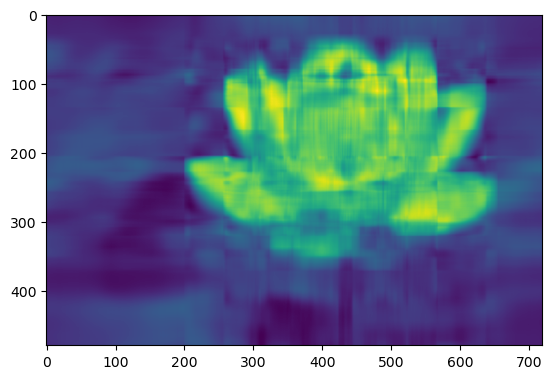

In [67]:
SVD_pic(10)

Percentage of information retained: 99.75% 



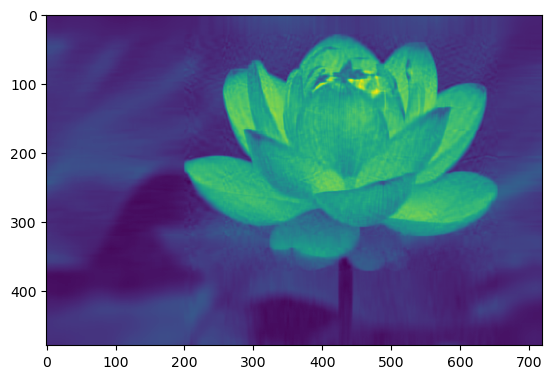

In [68]:
SVD_pic(40)

Percentage of information retained: 99.88% 



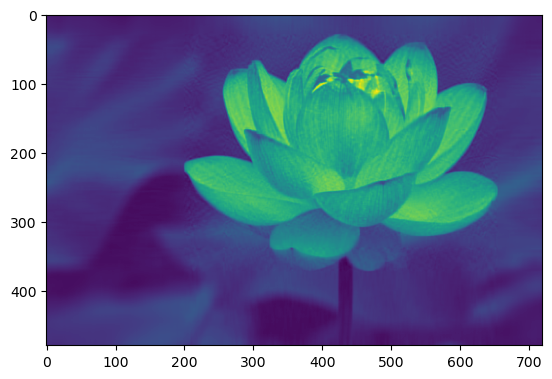

In [69]:
SVD_pic(60)

Percentage of information retained: 99.98% 



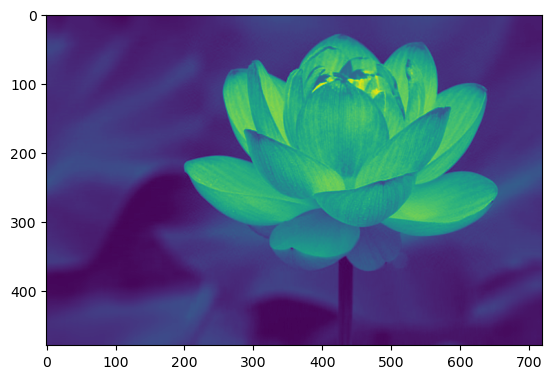

In [70]:
SVD_pic(120)

Percentage of information retained: 100.00% 



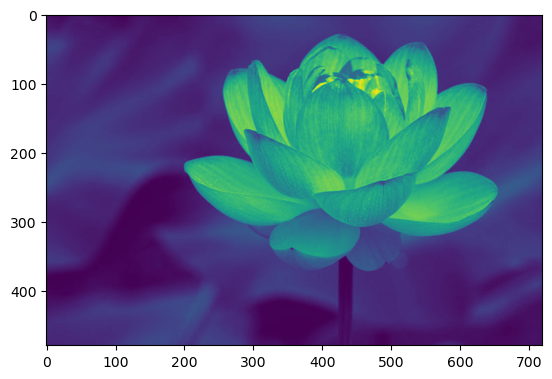

In [71]:
SVD_pic(450)